In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load

In [3]:
iris_df = pd.read_csv('iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Split Train-Test

In [6]:
# get distinct species name
species = iris_df['Species'].unique()
test = pd.DataFrame()
train = pd.DataFrame()
for s in species:
    species_df = iris_df[iris_df['Species'] == s]
    test = pd.concat([test, species_df.iloc[:3]])
    train = pd.concat([train, species_df.iloc[3:]])
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


## 1.a
First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

In [13]:
col = ['SepalLengthCm', 'SepalWidthCm', 'Species']
a_train = train[col]
a_test = test[col]

### Plot

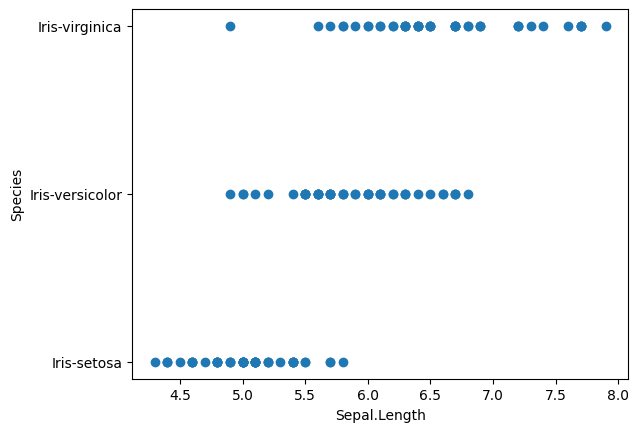

In [14]:
plt.scatter(a_train['SepalLengthCm'], a_train['Species'])
plt.xlabel('Sepal.Length')
plt.ylabel('Species')
plt.show()

**Inference:** General trend of SepalLength is setosa < versicolor < virginica

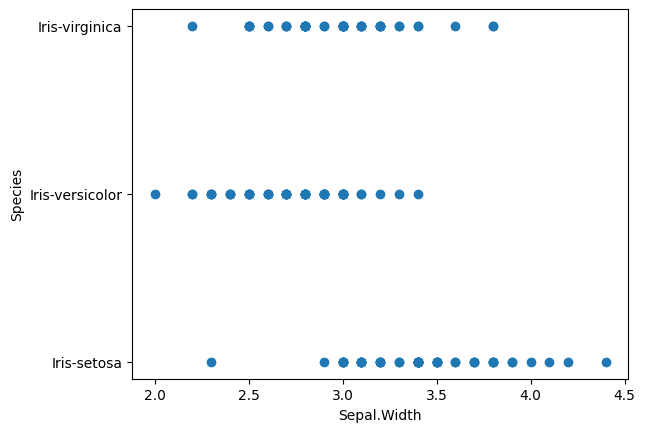

In [15]:
plt.scatter(a_train['SepalWidthCm'], a_train['Species'])
plt.xlabel('Sepal.Width')
plt.ylabel('Species')
plt.show()

**Inference:** General trend of SepalWidth is versicolor < virginica < setosa

In [17]:
def euclidian_dist(train, test):
    dist = np.zeros((len(test), len(train)))
    for i in range(len(test)):
        for j in range(len(train)):
            dist[i][j] = np.sqrt(np.sum((test.iloc[i, :-1] - train.iloc[j, :-1])**2))
    return dist

In [18]:
a_euclid_dist = euclidian_dist(a_train, a_test)
a_euclid_dist

array([[0.64031242, 0.14142136, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.31622777, 0.60827625, 1.02956301, ..., 1.6       , 1.36014705,
        1.        ],
       [0.14142136, 0.5       , 0.98994949, ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.71172428, 1.33416641, 1.08166538, ..., 0.36055513, 0.14142136,
        0.5       ],
       [1.26491106, 1.20415946, 1.26491106, ..., 0.76157731, 0.80622577,
        0.31622777],
       [2.5019992 , 2.18403297, 1.92353841, ..., 0.6       , 0.98488578,
        1.2       ]])